In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# 1. DIMENSIONAL REDUCTION AND DATA VISUALIZATION
# Load dataset
file_dataset = "input/credit_score.csv"
data = pd.read_csv(file_dataset, encoding = "latin-1")
feature_names = {
    "Age": "age",
    "Gender": "sex",
    "Income": "income",
    "Education": "educ",
    "Marital Status": "married",
    "Number of Children": "child",
    "Home Ownership": "house",
    "Credit Score": "score"}
data = data.rename(columns = feature_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      164 non-null    int64 
 1   sex      164 non-null    object
 2   income   164 non-null    int64 
 3   educ     164 non-null    object
 4   married  164 non-null    object
 5   child    164 non-null    int64 
 6   house    164 non-null    object
 7   score    164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [3]:
# Normalization
# Do minmax for all numerical features
scaler = MinMaxScaler()
num_cols = data.select_dtypes(include = [np.number]).columns.tolist()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Do ordinal encoding for education and credit score cols
order = ["High School Diploma",
         "Associate's Degree",
         "Bachelor's Degree",
         "Master's Degree",
         "Doctorate"]
oe = OrdinalEncoder(categories = [order], dtype = np.int32)
data["educ"] = oe.fit_transform(data["educ"].values.reshape(-1, 1))
order = ["Low",
         "Average",
         "High"]
oe = OrdinalEncoder(categories = [order], dtype = np.int32)
data["score"] = oe.fit_transform(data["score"].values.reshape(-1, 1))

# Do label encoding for all remaining nominal features
le = LabelEncoder()
object_cols = data.select_dtypes(include = ["object"]).columns.tolist()
for col in object_cols:
    data[col] = le.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      164 non-null    float64
 1   sex      164 non-null    int32  
 2   income   164 non-null    float64
 3   educ     164 non-null    int32  
 4   married  164 non-null    int32  
 5   child    164 non-null    float64
 6   house    164 non-null    int32  
 7   score    164 non-null    int32  
dtypes: float64(3), int32(5)
memory usage: 7.2 KB


,Component 0,Component 1,score
0,0.237567,-0.522795,2
1,-1.116655,0.252792,2
2,-2.012239,-0.356562,2
3,1.775238,1.163212,2
4,-0.303915,0.695236,2
...,...,...,...
159,2.663576,-0.821986,0
160,1.448835,-0.422838,1
161,-0.242321,0.535066,2
162,-0.921230,-0.104617,2


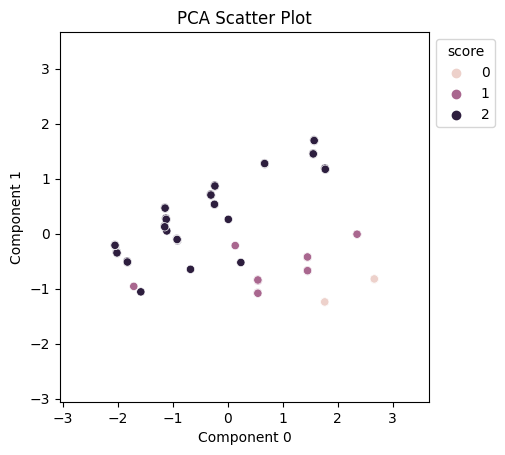

In [4]:
# PCA
def display_scatter(min_data, title):
    """Visualizes minimized dataset with scatter plot"""
    display(min_data)
    min_val = min(min_data[["Component 0", "Component 1"]].min(axis = 1))
    max_val = max(min_data[["Component 0", "Component 1"]].max(axis = 1))
    limit = (min_val - 1, max_val + 1)

    plt.figure()
    plt.title(title)
    scatter = sns.scatterplot(data = min_data, x = "Component 0", y = "Component 1", hue = "score")
    sns.move_legend(scatter, "upper left", bbox_to_anchor = (1, 1))
    scatter.set_xlim(limit)
    scatter.set_ylim(limit)
    scatter.set_aspect("equal")  # Square plot
    plt.show()


# PCA works only with numerical data, use FAMD for mixed data
pca = PCA(n_components = 2, random_state = 10)
pca_res = pca.fit_transform(data)
pca_data = pd.DataFrame({"Component 0": pca_res[:, 0], "Component 1": pca_res[:, 1], "score": data["score"]})
display_scatter(pca_data, "PCA Scatter Plot")

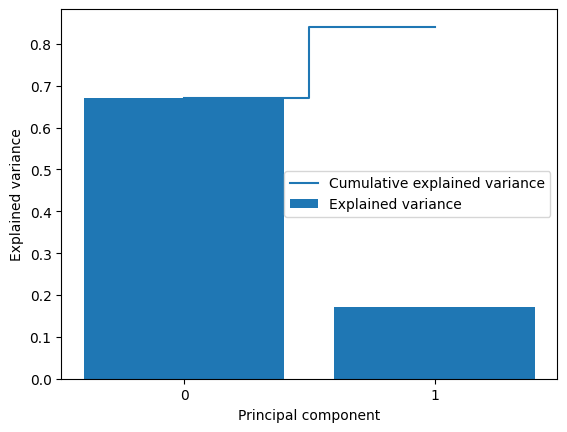

In [5]:
# Create bar plot for explained variance and line plot for cumulative explained variance
exp_var_pca = pca.explained_variance_ratio_  # Extract the explained variance by each principal component
cum_sum_eigenvalues = np.cumsum(exp_var_pca)  # Calculate cumulative sum of variances

plt.figure()
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, align = "center", label = "Explained variance")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where = "mid", label = "Cumulative explained variance")
plt.ylabel("Explained variance")
plt.xlabel("Principal component")
plt.legend(loc = "best")
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer = True))  # Use integer labels on X axis
plt.show()

C:\users\lol19\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\users\lol19\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,Component 0,Component 1,score
0,-8.283481,-11.526056,2
1,4.005547,2.738457,2
2,10.549671,3.637331,2
3,-4.088462,-2.828366,2
4,5.671676,-2.139911,2
...,...,...,...
159,-11.553900,-7.230703,0
160,-8.092607,-7.677922,1
161,4.768025,-2.741170,2
162,1.510733,6.372045,2


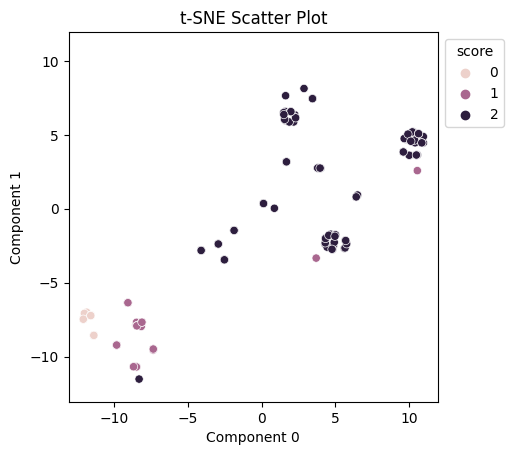

In [6]:
# t-SNE
tsne = TSNE(n_components = 2, random_state = 10)
tsne_res = tsne.fit_transform(data)
tsne_data = pd.DataFrame({"Component 0": tsne_res[:, 0], "Component 1": tsne_res[:, 1], "score": data["score"]})
display_scatter(tsne_data, "t-SNE Scatter Plot")

In [7]:
# 2. COLOR QUANTIZATION USING K-MEANS
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

# Load image as 3D array and normalize its RGB codes for plt.imshow()
file_image = "input/images/boeing_plant.jpg"
image = Image.open(file_image)
image = np.array(image)
image = np.array(image, dtype = np.float64) / 255

# Check the shape of image and transform it into a 2D array
w, h, d = tuple(image.shape)
print(f"Resolution = {w} x {h}p = {w * h}p, depth = {d}")
if d != 3:
    raise Exception("RGB color model is not used!")
pixels = np.reshape(image, (w * h, d))

# Count the unique colors in original image
unique_colors = np.unique(pixels, axis = 0)
num_colors = len(unique_colors)
print(f"Image contains {num_colors} unique colors")

Resolution = 1982 x 3000p = 5946000p, depth = 3
Image contains 362305 unique colors


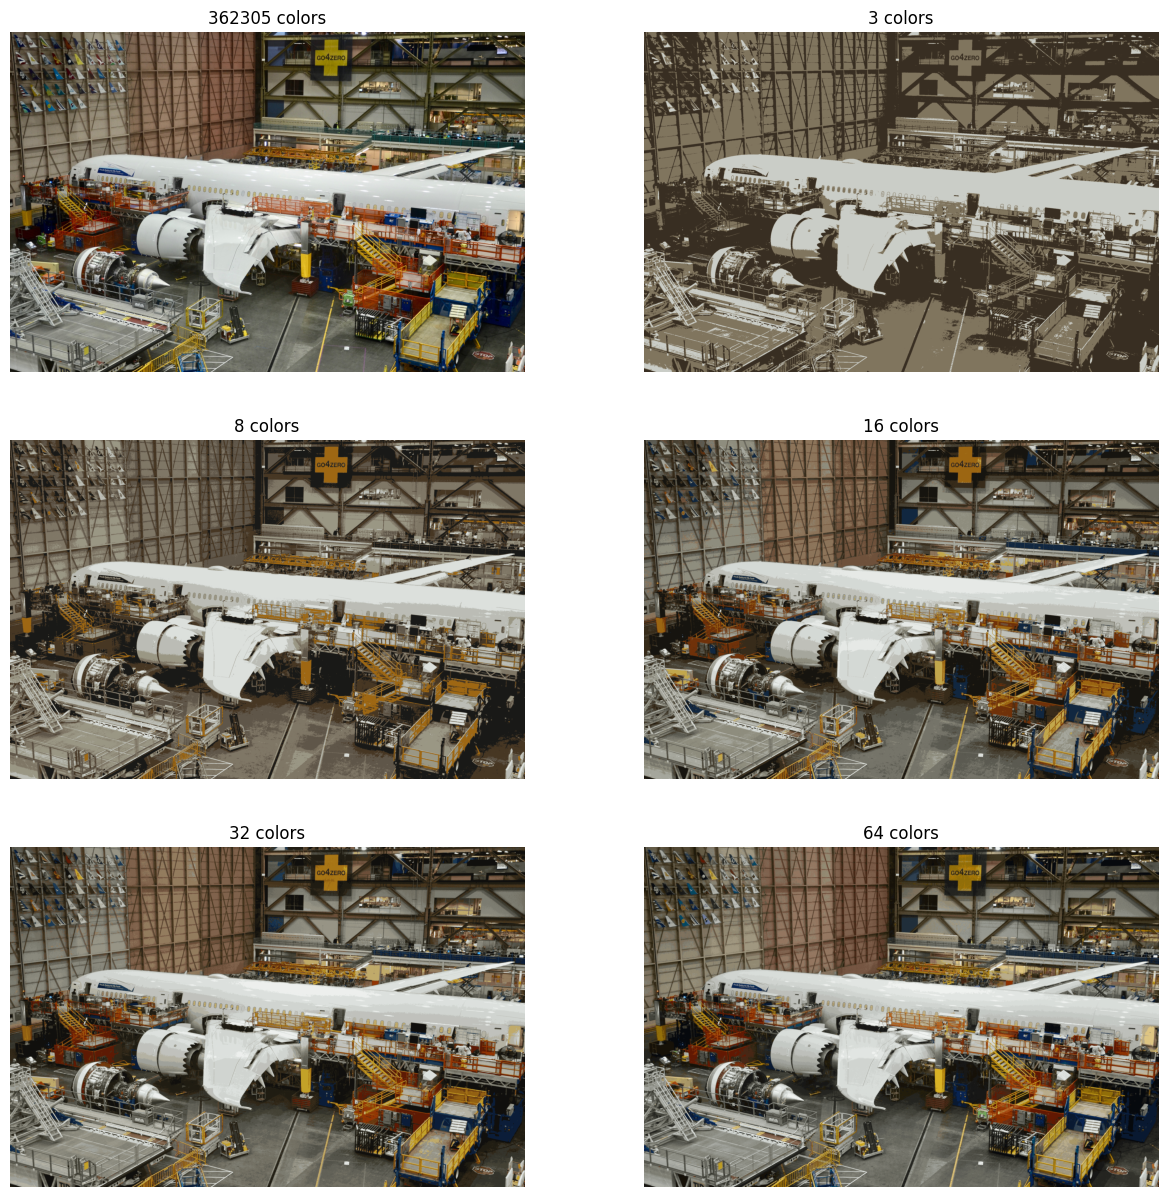

In [8]:
# Functions
def display_images(images):
    """Displays images in 2 columns"""
    n = len(images)
    rows = n // 2
    cols = 2 if n > 1 else 1

    plt.figure(figsize = (15, 15))
    for i, (n_colors, image) in enumerate(images.items()):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.title(f"{n_colors} colors")
        plt.axis("off")
    plt.show()


def recreate_image(codebook, labels, w, h):
    """
    Recreates compressed image from the codebook and labels

    Parameters:
    codebook (np.array): an array of cluster centers
    labels (np.array): an array of cluster labels for each pixel
    w (int): width
    h (int): height

    Returns:
    np.array: the flat array, which is reshaped back into the original image shape
    """
    indexed_codebook = codebook[labels]  # Index the codebook with labels
    reshaped_codebook = indexed_codebook.reshape(w, h, -1)  # Reshape the indexed codebook
    return reshaped_codebook


# Create a sample of 1000 items from the pixels
sample = shuffle(pixels, random_state = 10, n_samples = 1000)

# Reduce the number of unique colors in image to [3, 8, 16, 32, 64]
images = {num_colors: image}
for n_colors in [3, 8, 16, 32, 64]:
    # Fit model on a small sub-sample of the image
    kmeans = KMeans(n_clusters = n_colors, n_init = 10, random_state = 10).fit(sample)
    labels = kmeans.predict(pixels)  # Assign each pixel to a cluster -> get array of cluster labels, one for each pixel
    quantified_image = recreate_image(kmeans.cluster_centers_, labels, w, h)
    images[n_colors] = quantified_image
display_images(images)

In [9]:
# 3.PROCESSING AND CLASSIFICATION OF TEXT DATA
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Load dataset
pd.set_option("display.max_colwidth", 200)

file_dataset = "input/texts/tweet_emotions.csv"
data = pd.read_csv(file_dataset, encoding = "latin-1")
data = data.drop("tweet_id", axis = 1)
feature_names = {
    "sentiment": "mood",
    "content": "text"}
data = data.rename(columns = feature_names)
data.info()

unique_vals = data["mood"].unique()
print(f"\nUnique vals in 'mood' col: {unique_vals}")
chosen_moods = ["hate", "sadness", "relief"]
data = data[data["mood"].isin(chosen_moods)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mood    40000 non-null  object
 1   text    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB

Unique vals in 'mood' col: ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lol19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lol19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lol19\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Preprocess dataset
def clean_text(text):
    tokens = word_tokenize(text)  # Split text into tokens

    # Remove punctuation, convert to lower case, clean stop words
    stop_words = stopwords.words("english")
    words = []
    for token in tokens:
        if token.isalpha():
            word = token.lower()
            if word not in stop_words:
                words.append(word)

    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in words:
        stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)
    stemmed_text = " ".join(stemmed_words)

    return stemmed_text

data_before = data.copy()
data["text"] = data["text"].apply(clean_text)
display(data_before.head(6))
display(data.head(6))

,mood,text
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,Funeral ceremony...gloomy friday...
6,sadness,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!"
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?
12,sadness,Ugh! I have to beat this stupid song to get to the next rude!


,mood,text
1,sadness,layin n bed headach ughhhh waitin call
2,sadness,funer ceremoni gloomi friday
6,sadness,sleep im think old friend want marri damn amp want scandal
8,sadness,charviray charlen love miss
9,sadness,kelcouch sorri least friday
12,sadness,ugh beat stupid song get next rude


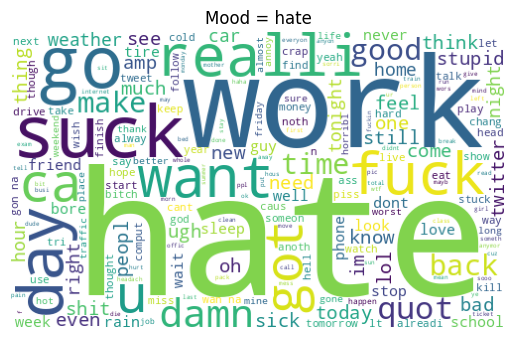

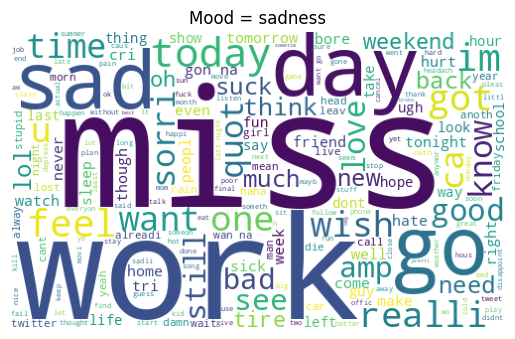

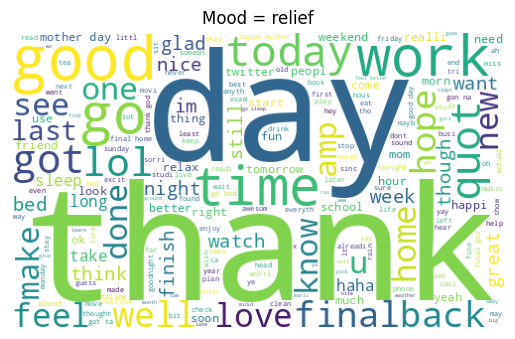

In [11]:
# Visualize words
def display_wordcloud(data, mood):
    texts = ""
    for text in data[data["mood"] == mood]["text"]:
        texts += text.lower() + " "

    wordcloud = WordCloud(width = 500, height = 300, background_color = "white", random_state = 10)
    wordcloud = wordcloud.generate(texts)
    plt.figure()
    plt.imshow(wordcloud)
    plt.title(f"Mood = {mood}")
    plt.axis("off")
    plt.show()


for mood in chosen_moods:
    display_wordcloud(data, mood)

In [12]:
# Vectorization with TFIDF
train, test = train_test_split(data, test_size = 0.2, random_state = 10)

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(train["text"])
tfidf_test = tfidf.transform(test["text"])

clf = LogisticRegression(max_iter = 1000, random_state = 10)
clf = clf.fit(tfidf_train, train["mood"])
predicted = clf.predict(tfidf_test)

print(classification_report(test["mood"], predicted))
print(confusion_matrix(test["mood"], predicted))

              precision    recall  f1-score   support

        hate       0.80      0.20      0.32       279
      relief       0.70      0.30      0.42       300
     sadness       0.70      0.95      0.80      1024

    accuracy                           0.70      1603
   macro avg       0.73      0.48      0.51      1603
weighted avg       0.71      0.70      0.65      1603

[[ 55   5 219]
 [  0  91 209]
 [ 14  34 976]]


In [13]:
# Vectorization with CountVectorizer
train, test = train_test_split(data, test_size = 0.2, random_state = 10)

count = CountVectorizer()
count_train = count.fit_transform(train["text"])
count_test = count.transform(test["text"])

clf = LogisticRegression(max_iter = 1000, random_state = 10)
clf = clf.fit(count_train, train["mood"])
predicted = clf.predict(count_test)

print(classification_report(test["mood"], predicted))
print(confusion_matrix(test["mood"], predicted))

              precision    recall  f1-score   support

        hate       0.57      0.28      0.38       279
      relief       0.60      0.41      0.49       300
     sadness       0.72      0.89      0.80      1024

    accuracy                           0.69      1603
   macro avg       0.63      0.53      0.55      1603
weighted avg       0.67      0.69      0.67      1603

[[ 79  15 185]
 [ 10 124 166]
 [ 49  67 908]]
